In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
# create Nitrogen oxides DataFrame

df_no2 = pd.read_csv('LaqnData_no2.csv')
print(df_no2.shape)
df_no2.tail()

(30312, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
30307,EN4,NO2,27/10/2019 00:00,31.7,ug m-3,P
30308,EN4,NO2,28/10/2019 00:00,41.1,ug m-3,P
30309,EN4,NO2,29/10/2019 00:00,39.8,ug m-3,P
30310,EN4,NO2,30/10/2019 00:00,38.3,ug m-3,P
30311,EN4,NO2,31/10/2019 00:00,38.9,ug m-3,P


In [3]:
# extra info about the DataFrame

df_no2.describe()

,Value
count,28078.000000
mean,42.255673
std,17.988358
min,3.500000
25%,28.900000
50%,40.500000
75%,53.300000
max,168.899990


In [4]:
# check number of sites (must be 6)

df_no2.Site.value_counts(dropna=False)

LH0    4991
RI1    4991
EN4    4991
CT3    4991
ZR2    4991
BL0    4991
Name: Site, dtype: int64

In [5]:
# create new column with site codes

df_no2.loc[df_no2.Site == 'CT3', 'Site_code'] = 1
df_no2.loc[df_no2.Site == 'LH0', 'Site_code'] = 2
df_no2.loc[df_no2.Site == 'BL0', 'Site_code'] = 3
df_no2.loc[df_no2.Site == 'RI1', 'Site_code'] = 4
df_no2.loc[df_no2.Site == 'EN4', 'Site_code'] = 5
df_no2.loc[df_no2.Site == 'ZR2', 'Site_code'] = 6

In [6]:
# check the new column

df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
0,CT3,NO2,01/01/2006 00:00,37.4,ug m-3,R,1.0
1,CT3,NO2,02/01/2006 00:00,39.8,ug m-3,R,1.0
2,CT3,NO2,03/01/2006 00:00,57.5,ug m-3,R,1.0
3,CT3,NO2,04/01/2006 00:00,51.0,ug m-3,R,1.0
4,CT3,NO2,05/01/2006 00:00,50.7,ug m-3,R,1.0


In [7]:
# check tail of the DataFrame

df_no2.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
29941,EN4,NO2,27/08/2019 00:00,45.3,ug m-3,P,5.0
29942,EN4,NO2,28/08/2019 00:00,19.6,ug m-3,P,5.0
29943,EN4,NO2,29/08/2019 00:00,21.9,ug m-3,P,5.0
29944,EN4,NO2,30/08/2019 00:00,29.8,ug m-3,P,5.0
29945,EN4,NO2,31/08/2019 00:00,29.8,ug m-3,P,5.0


In [9]:
# check minimum and maximum values

print(df_no2.min())
df_no2.max()

Site                                    BL0
Species                                 NO2
ReadingDateTime            01/01/2006 00:00
Value                                   3.5
Units                                ug m-3
Provisional or Ratified                   P
Site_code                                 1
dtype: object


Site                                    ZR2
Species                                 NO2
ReadingDateTime            31/12/2018 00:00
Value                                 168.9
Units                                ug m-3
Provisional or Ratified                   R
Site_code                                 6
dtype: object

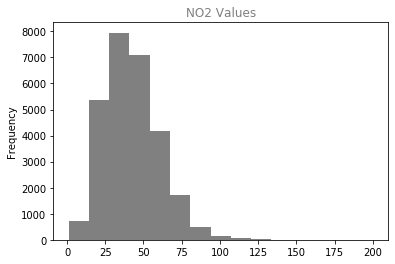

In [10]:
# make a frequency barplot

df_no2.Value.plot.hist(range=(1, 200), bins=15, color='grey')
plt.title('NO2 Values', color = 'grey')
plt.show()

In [11]:
# check number of missing values

df_no2.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      2156
Units                         0
Provisional or Ratified       0
Site_code                     0
dtype: int64

In [12]:
# check missing values

df_no2.loc[(df_no2).Value.isnull()]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
46,CT3,NO2,16/02/2006 00:00,NaN,ug m-3,R,1.0
47,CT3,NO2,17/02/2006 00:00,NaN,ug m-3,R,1.0
204,CT3,NO2,24/07/2006 00:00,NaN,ug m-3,R,1.0
205,CT3,NO2,25/07/2006 00:00,NaN,ug m-3,R,1.0
206,CT3,NO2,26/07/2006 00:00,NaN,ug m-3,R,1.0
...,...,...,...,...,...,...,...
29299,EN4,NO2,23/11/2017 00:00,NaN,ug m-3,R,5.0
29300,EN4,NO2,24/11/2017 00:00,NaN,ug m-3,R,5.0
29492,EN4,NO2,04/06/2018 00:00,NaN,ug m-3,R,5.0
29493,EN4,NO2,05/06/2018 00:00,NaN,ug m-3,R,5.0


In [13]:
# convert strings to datetime objects

df_no2.ReadingDateTime = pd.to_datetime(df_no2.ReadingDateTime)
df_no2

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code
0,CT3,NO2,2006-01-01,37.4,ug m-3,R,1.0
1,CT3,NO2,2006-02-01,39.8,ug m-3,R,1.0
2,CT3,NO2,2006-03-01,57.5,ug m-3,R,1.0
3,CT3,NO2,2006-04-01,51.0,ug m-3,R,1.0
4,CT3,NO2,2006-05-01,50.7,ug m-3,R,1.0
...,...,...,...,...,...,...,...
29941,EN4,NO2,2019-08-27,45.3,ug m-3,P,5.0
29942,EN4,NO2,2019-08-28,19.6,ug m-3,P,5.0
29943,EN4,NO2,2019-08-29,21.9,ug m-3,P,5.0
29944,EN4,NO2,2019-08-30,29.8,ug m-3,P,5.0


In [14]:
# df_no2.ReadingDateTime.map(lambda x: x[4:])
# df_no2

In [15]:
# create PM10 particulates DataFrame

df_pm10 = pd.read_csv('LaqnData_pm10.csv')
print(df_pm10.shape)
df_pm10.head()

(29946, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,PM10,01/01/2006 00:00,7.0,ug/m3,R
1,CT3,PM10,02/01/2006 00:00,14.0,ug/m3,R
2,CT3,PM10,03/01/2006 00:00,19.0,ug/m3,R
3,CT3,PM10,04/01/2006 00:00,18.0,ug/m3,R
4,CT3,PM10,05/01/2006 00:00,20.0,ug/m3,R


In [16]:
# check number of sites 

df_pm10.Site.value_counts(dropna=False)

LH0    4991
RI1    4991
EN4    4991
CT3    4991
ZR2    4991
BL0    4991
Name: Site, dtype: int64

In [17]:
# create new column with site codes

df_pm10.loc[df_pm10.Site == 'CT3', 'Site_code2'] = 1
df_pm10.loc[df_pm10.Site == 'LH0', 'Site_code2'] = 2
df_pm10.loc[df_pm10.Site == 'BL0', 'Site_code2'] = 3
df_pm10.loc[df_pm10.Site == 'RI1', 'Site_code2'] = 4
df_pm10.loc[df_pm10.Site == 'EN4', 'Site_code2'] = 5
df_pm10.loc[df_pm10.Site == 'ZR2', 'Site_code2'] = 6

In [18]:
# check the new column

df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2
0,CT3,PM10,01/01/2006 00:00,7.0,ug/m3,R,1.0
1,CT3,PM10,02/01/2006 00:00,14.0,ug/m3,R,1.0
2,CT3,PM10,03/01/2006 00:00,19.0,ug/m3,R,1.0
3,CT3,PM10,04/01/2006 00:00,18.0,ug/m3,R,1.0
4,CT3,PM10,05/01/2006 00:00,20.0,ug/m3,R,1.0


In [19]:
# check minimum and maximum values

print(df_pm10.min())
df_pm10.max()

Site                                                 BL0
Species                                             PM10
ReadingDateTime                         01/01/2006 00:00
Value                                                 -1
Units                      ug m-3 reference equiv by VCM
Provisional or Ratified                                P
Site_code2                                             1
dtype: object


Site                                    ZR2
Species                                PM10
ReadingDateTime            31/12/2018 00:00
Value                                 138.9
Units                                 ug/m3
Provisional or Ratified                   R
Site_code2                                6
dtype: object

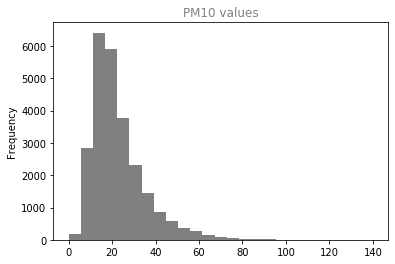

In [20]:
# create a frequency barplot

df_pm10.Value.plot.hist(range=(0, 140), bins=25, color='grey')
plt.title('PM10 values', color = 'grey')
plt.show()

In [21]:
# check number of missing values

df_pm10.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      4622
Units                         0
Provisional or Ratified       0
Site_code2                    0
dtype: int64

In [22]:
# check missing values

df_pm10.loc[(df_pm10).Value.isnull()]

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2
46,CT3,PM10,16/02/2006 00:00,NaN,ug/m3,R,1.0
47,CT3,PM10,17/02/2006 00:00,NaN,ug/m3,R,1.0
48,CT3,PM10,18/02/2006 00:00,NaN,ug/m3,R,1.0
49,CT3,PM10,19/02/2006 00:00,NaN,ug/m3,R,1.0
50,CT3,PM10,20/02/2006 00:00,NaN,ug/m3,R,1.0
...,...,...,...,...,...,...,...
29941,EN4,PM10,27/08/2019 00:00,NaN,ug/m3,P,5.0
29942,EN4,PM10,28/08/2019 00:00,NaN,ug/m3,P,5.0
29943,EN4,PM10,29/08/2019 00:00,NaN,ug/m3,P,5.0
29944,EN4,PM10,30/08/2019 00:00,NaN,ug/m3,P,5.0


In [23]:
# convert strings to datetime objects

df_pm10.ReadingDateTime = pd.to_datetime(df_pm10.ReadingDateTime)
df_pm10

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Site_code2
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,1.0
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,1.0
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,1.0
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,1.0
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,1.0
...,...,...,...,...,...,...,...
29941,EN4,PM10,2019-08-27,NaN,ug/m3,P,5.0
29942,EN4,PM10,2019-08-28,NaN,ug/m3,P,5.0
29943,EN4,PM10,2019-08-29,NaN,ug/m3,P,5.0
29944,EN4,PM10,2019-08-30,NaN,ug/m3,P,5.0


In [24]:
# create 'Year_bins'
